In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import plotly.express as px
import json
from urllib.request import urlopen

In [3]:
# Setting the Data files
counties_population_path = os.path.join("Resources","co-est2019-annres.xlsx")
covid_counties_path = os.path.join("Resources","us-counties.csv")

In [4]:
# Read the population data and the case results
population_metadata = pd.read_excel(counties_population_path)
case_results = pd.read_csv(covid_counties_path)

In [5]:
population_metadata

,Geographic Area,2018,2019
0,United States,326687501,328239523
1,".Autauga County, Alabama",55533,55869
2,".Baldwin County, Alabama",217855,223234
3,".Barbour County, Alabama",24872,24686
4,".Bibb County, Alabama",22367,22394
...,...,...,...
3138,".Sweetwater County, Wyoming",42858,42343
3139,".Teton County, Wyoming",23269,23464
3140,".Uinta County, Wyoming",20292,20226
3141,".Washakie County, Wyoming",7877,7805


In [6]:
case_results

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
615474,2020-10-09,Sweetwater,Wyoming,56037.0,393,2
615475,2020-10-09,Teton,Wyoming,56039.0,656,1
615476,2020-10-09,Uinta,Wyoming,56041.0,378,2
615477,2020-10-09,Washakie,Wyoming,56043.0,122,6


##Population Data

In [7]:
# Extract the county and state information from "Geographic Area" column
population_metadata["county"] = ""
population_metadata["state"] = ""
for index, row in population_metadata.iterrows():
    county_state =  row["Geographic Area"].split(",")
    population_metadata.loc[index,"county"] = county_state[0].split(" County")[0].lstrip(".")
    try:
        population_metadata.loc[index,"state"] = county_state[1].lstrip(" ")
    except:
        population_metadata.loc[index,"state"] = ""
population_metadata

,Geographic Area,2018,2019,county,state
0,United States,326687501,328239523,United States,
1,".Autauga County, Alabama",55533,55869,Autauga,Alabama
2,".Baldwin County, Alabama",217855,223234,Baldwin,Alabama
3,".Barbour County, Alabama",24872,24686,Barbour,Alabama
4,".Bibb County, Alabama",22367,22394,Bibb,Alabama
...,...,...,...,...,...
3138,".Sweetwater County, Wyoming",42858,42343,Sweetwater,Wyoming
3139,".Teton County, Wyoming",23269,23464,Teton,Wyoming
3140,".Uinta County, Wyoming",20292,20226,Uinta,Wyoming
3141,".Washakie County, Wyoming",7877,7805,Washakie,Wyoming


In [8]:
# Remove "Geographic Area" column
del population_metadata["Geographic Area"]

In [9]:
population_metadata

,2018,2019,county,state
0,326687501,328239523,United States,
1,55533,55869,Autauga,Alabama
2,217855,223234,Baldwin,Alabama
3,24872,24686,Barbour,Alabama
4,22367,22394,Bibb,Alabama
...,...,...,...,...
3138,42858,42343,Sweetwater,Wyoming
3139,23269,23464,Teton,Wyoming
3140,20292,20226,Uinta,Wyoming
3141,7877,7805,Washakie,Wyoming


In [10]:
population_metadata.loc[population_metadata["state"] == ""]

,2018,2019,county,state
0,326687501,328239523,United States,


In [11]:
# Merge the dataframes
merged_df = pd.merge(case_results, population_metadata, left_on=["county","state"], right_on=["county","state"], how="left")
merged_df

,date,county,state,fips,cases,deaths,2018,2019
0,2020-01-21,Snohomish,Washington,53061.0,1,0,813059.0,822083.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0,813059.0,822083.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0,813059.0,822083.0
3,2020-01-24,Cook,Illinois,17031.0,1,0,5171960.0,5150233.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0,813059.0,822083.0
...,...,...,...,...,...,...,...,...
615474,2020-10-09,Sweetwater,Wyoming,56037.0,393,2,42858.0,42343.0
615475,2020-10-09,Teton,Wyoming,56039.0,656,1,23269.0,23464.0
615476,2020-10-09,Uinta,Wyoming,56041.0,378,2,20292.0,20226.0
615477,2020-10-09,Washakie,Wyoming,56043.0,122,6,7877.0,7805.0


In [12]:
# Rename columns
new_merged_df = merged_df.rename(columns={
    2018: 'population_2018',
    2019: 'population_2019'
})

new_merged_df.head()

,date,county,state,fips,cases,deaths,population_2018,population_2019
0,2020-01-21,Snohomish,Washington,53061.0,1,0,813059.0,822083.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0,813059.0,822083.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0,813059.0,822083.0
3,2020-01-24,Cook,Illinois,17031.0,1,0,5171960.0,5150233.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0,813059.0,822083.0


In [13]:
new_merged_df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths', 'population_2018',
       'population_2019'],
      dtype='object')

In [14]:
is_NaN = new_merged_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = new_merged_df[row_has_NaN]
rows_with_NaN.to_excel("rows_with_nans.xlsx")

In [15]:
len(new_merged_df)

615479

In [18]:
new_merged_df = new_merged_df.dropna(how="any")

In [19]:
len(new_merged_df)

596535

In [20]:
new_merged_df.dtypes

date                object
county              object
state               object
fips               float64
cases                int64
deaths               int64
population_2018    float64
population_2019    float64
dtype: object

In [21]:
# Convert the datatypes of columns to int32
new_merged_df["cases"] = new_merged_df["cases"].astype(int)
new_merged_df["deaths"] = new_merged_df["deaths"].astype(int)
new_merged_df["population_2018"] = new_merged_df["population_2018"].astype(int)
new_merged_df["population_2019"] = new_merged_df["population_2019"].astype(int)

new_merged_df.dtypes

date                object
county              object
state               object
fips               float64
cases                int32
deaths               int32
population_2018      int32
population_2019      int32
dtype: object

In [22]:
# Calculate Cases per Thousand and Deaths per Thousand
new_merged_df["cases_per_thousand"] = new_merged_df["cases"]/new_merged_df["population_2019"]*1000
new_merged_df["deaths_per_thousand"] = new_merged_df["deaths"]/new_merged_df["population_2019"]*1000
new_merged_df

,date,county,state,fips,cases,deaths,population_2018,population_2019,cases_per_thousand,deaths_per_thousand
0,2020-01-21,Snohomish,Washington,53061.0,1,0,813059,822083,0.001216,0.000000
1,2020-01-22,Snohomish,Washington,53061.0,1,0,813059,822083,0.001216,0.000000
2,2020-01-23,Snohomish,Washington,53061.0,1,0,813059,822083,0.001216,0.000000
3,2020-01-24,Cook,Illinois,17031.0,1,0,5171960,5150233,0.000194,0.000000
4,2020-01-24,Snohomish,Washington,53061.0,1,0,813059,822083,0.001216,0.000000
...,...,...,...,...,...,...,...,...,...,...
615474,2020-10-09,Sweetwater,Wyoming,56037.0,393,2,42858,42343,9.281345,0.047233
615475,2020-10-09,Teton,Wyoming,56039.0,656,1,23269,23464,27.957722,0.042618
615476,2020-10-09,Uinta,Wyoming,56041.0,378,2,20292,20226,18.688816,0.098883
615477,2020-10-09,Washakie,Wyoming,56043.0,122,6,7877,7805,15.631006,0.768738


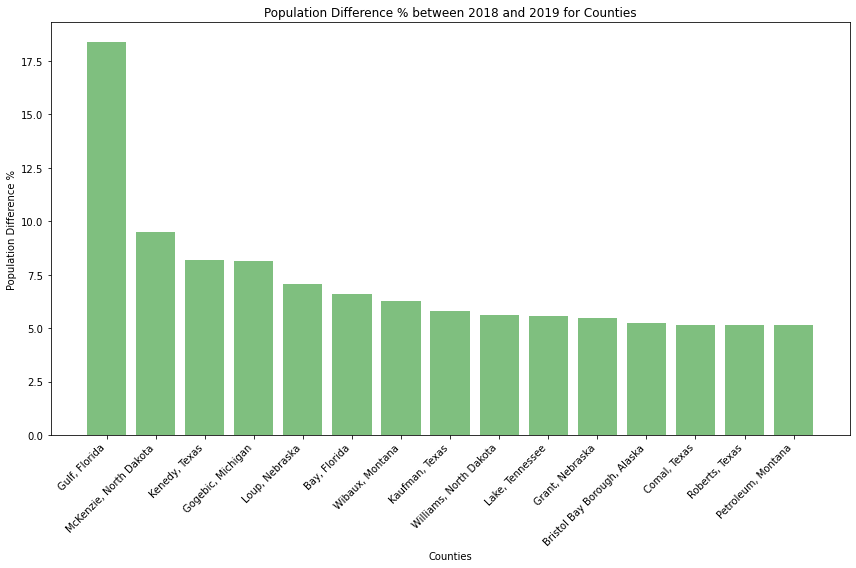

In [23]:
# Check the difference in population between 2018 and 2019
new_merged_df["population_diff"] = new_merged_df["population_2019"] - new_merged_df["population_2018"]
new_merged_df["population_diff_%"] = new_merged_df["population_diff"] / new_merged_df["population_2019"] * 100
new_merged_df["abs_population_diff_%"] = abs(new_merged_df["population_diff_%"])
pop_diff_merged_df = new_merged_df.groupby(["county", "state"])["abs_population_diff_%"].first()
pop_diff_merged_df = pop_diff_merged_df.reset_index()
pop_diff_merged_df = pop_diff_merged_df.sort_values("abs_population_diff_%", ascending=False).head(15)

pop_diff_merged_df["county_state"] = pop_diff_merged_df["county"].str.cat(pop_diff_merged_df["state"], sep=", ")

# Set the plot size
plt.figure(figsize=(12,8))

# Set the x axis and y axis
x_axis = pop_diff_merged_df["county_state"]
y_axis = pop_diff_merged_df["abs_population_diff_%"]

# Genarate bar plot
plt.bar(x_axis, y_axis, color="green", alpha=0.5, align="center")

# Set the x axis label orientation
plt.xticks(rotation=45, ha="right")

# Set the x axis and y axis labels and titles
plt.xlabel("Counties")
plt.ylabel("Population Difference %")
plt.title("Population Difference % between 2018 and 2019 for Counties")

# Save and display the plot
file_path = os.path.join("Images","population_diff_bar.png")
plt.savefig(file_path)
plt.tight_layout()
plt.show()

<ipython-input-24-34aa56fc7b12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_covid_df["county_state"] = latest_covid_df["county"].str.cat(latest_covid_df["state"], sep=", ")


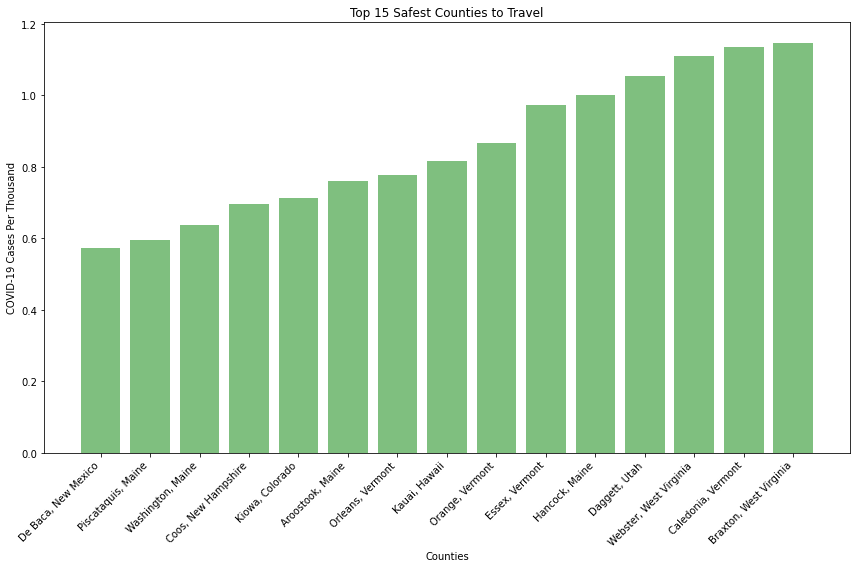

In [24]:
latest_covid_df = new_merged_df.loc[new_merged_df["date"] == "2020-10-09"]
latest_covid_df["county_state"] = latest_covid_df["county"].str.cat(latest_covid_df["state"], sep=", ")
latest_covid_df = latest_covid_df[["county","state","fips","cases_per_thousand","deaths_per_thousand","county_state"]]
top_15_safest_df = latest_covid_df.sort_values("cases_per_thousand").head(15)

# Set the plot size
plt.figure(figsize=(12,8))

# Set the x axis and y axis
x_axis = top_15_safest_df["county_state"]
y_axis = top_15_safest_df["cases_per_thousand"]

# Genarate bar plot
plt.bar(x_axis, y_axis, color="green", alpha=0.5, align="center")

# Set the x axis label orientation
plt.xticks(rotation=45, ha="right")

# Set the x axis and y axis labels and titles
plt.xlabel("Counties")
plt.ylabel("COVID-19 Cases Per Thousand")
plt.title("Top 15 Safest Counties to Travel")

# Save and display the plot
file_path = os.path.join("Images","top_15_safest_counties_bar.png")
plt.savefig(file_path)
plt.tight_layout()
plt.show()